<a href="https://colab.research.google.com/github/TEhyeok/AIFFEL_Exploration/blob/main/Rock_scissor_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import glob
import os
from keras.preprocessing.image import ImageDataGenerator
import kera
from keras.layers import BatchNormalization, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

print(tf.__version__)
print(np.__version__)
print("PIL 라이브러리 import 완료!")

2.14.0
1.23.5
PIL 라이브러리 import 완료!


In [ ]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

In [ ]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/rock_scissor_paper/train/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/rock_scissor_paper/train/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/rock_scissor_paper/train/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.


<ipython-input-29-a38288c7c6c5>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [ ]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [ ]:
image_dir_path = "/content/drive/MyDrive/rock_scissor_paper/train"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


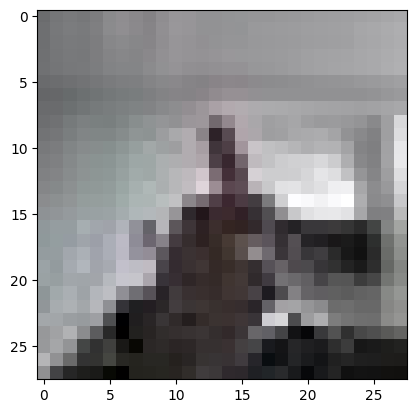

In [ ]:
plt.imshow(x_train[3])
print('라벨: ', y_train[3])

## 테스트 데이터

In [ ]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.


<ipython-input-29-a38288c7c6c5>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)
라벨:  0


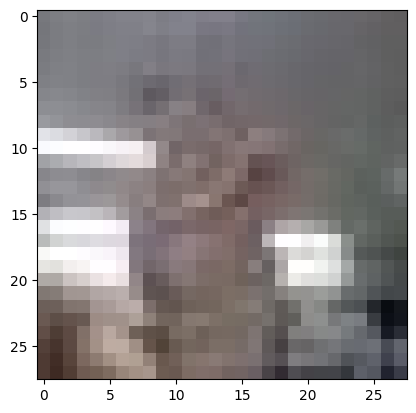

In [ ]:
test_image_dir_path = "/content/drive/MyDrive/rock_scissor_paper/test"
(x_test, y_test)=load_data(test_image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [ ]:
# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=20

# model=keras.models.Sequential()
# model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
# model.add(keras.layers.MaxPool2D(2,2))
# model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D((2,2)))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(n_dense, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))
# test_loss: 5.714621067047119
# test_accuracy: 0.3566666543483734

# 드롭 아웃 layer를 추가하였다.
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.5))  # Dropout layer 추가
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))  # 출력 유닛을 3개로 변경
# test_loss: 0.780379056930542
# test_accuracy: 0.7699999809265137

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 5, 5, 64)          0         
                                                                 
 flatten_14 (Flatten)        (None, 1600)            

In [ ]:
def model_structure_1(input_shape):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(3, activation='softmax'))
    return model

def model_structure_2(input_shape):
    # 데이터 확장 설정
    datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=False
    )

    model=keras.models.Sequential()
    model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
    model.add(BatchNormalization())
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Dropout(0.25))

    model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Dropout(0.25))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(n_dense, activation='relu'))
    model.add(BatchNormalization())
    model.add(keras.layers.Dropout(0.5))

    model.add(keras.layers.Dense(3, activation='softmax'))
    return model

def model_structure_3(input_shape):
    model=keras.models.Sequential()
    model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Dropout(0.5))  # Dropout layer 추가
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(n_dense, activation='relu'))
    model.add(keras.layers.Dense(3, activation='softmax'))  # 출력 유닛을 3개로 변경
    return model

def model_structure_4(input_shape):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Dropout(0.25))  # Dropout 추가

    model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Dropout(0.25))  # Dropout 추가

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.5))   # Dense 레이어 전에도 Dropout 추가
    model.add(keras.layers.Dense(3, activation='softmax'))
    return model


def model_structure_5(input_shape):
    model = keras.models.Sequential()

    # First convolutional layer
    model.add(Conv2D(64, (3,3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.3))

    # Second convolutional layer
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.3))

    # Flatten and dense layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))

    return model

def model_structure_6(input_shape):
    model = keras.models.Sequential()

    model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(Dropout(0.3))

    model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(Dropout(0.3))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(n_dense, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(keras.layers.Dense(3, activation='softmax'))

    return model

Epoch 1/20
5/5 [==============================] - 1s 102ms/step - loss: 29.0047 - accuracy: 0.3791 - val_loss: 16.3687 - val_accuracy: 0.3333
Epoch 2/20
5/5 [==============================] - 0s 49ms/step - loss: 4.8557 - accuracy: 0.5359 - val_loss: 7.0841 - val_accuracy: 0.3333
Epoch 3/20
5/5 [==============================] - 0s 67ms/step - loss: 0.5748 - accuracy: 0.8105 - val_loss: 2.4333 - val_accuracy: 0.3100
Epoch 4/20
5/5 [==============================] - 0s 65ms/step - loss: 0.4016 - accuracy: 0.9216 - val_loss: 9.5206 - val_accuracy: 0.3333
Epoch 5/20
5/5 [==============================] - 0s 49ms/step - loss: 0.0813 - accuracy: 0.9869 - val_loss: 6.8692 - val_accuracy: 0.3333
Epoch 6/20
5/5 [==============================] - 0s 49ms/step - loss: 0.0787 - accuracy: 0.9804 - val_loss: 10.0963 - val_accuracy: 0.3333
Epoch 7/20
5/5 [==============================] - 0s 48ms/step - loss: 0.0347 - accuracy: 0.9804 - val_loss: 5.8976 - val_accuracy: 0.3300
Epoch 8/20
5/5 [=======

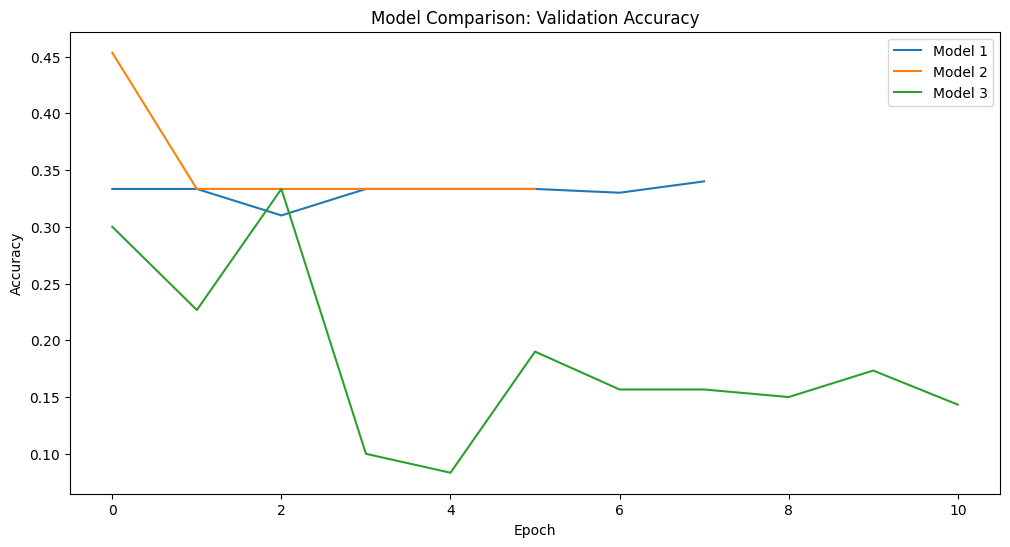

In [ ]:
from keras.callbacks import EarlyStopping

# 여러 모델 구조를 리스트로 저장
models = [model_structure_1, model_structure_2, model_structure_3]

history_list = []

early_stop = EarlyStopping(monitor='val_loss', patience=5) # 5 epoch 동안 개선되지 않으면 중단

for create_model in models:
    model = create_model((28,28,3))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=n_train_epoch, validation_data=(x_test, y_test), callbacks=[early_stop])
    history_list.append(history)

# 시각화
plt.figure(figsize=(12,6))

for idx, history in enumerate(history_list):
    plt.plot(history.history['val_accuracy'], label=f'Model {idx + 1}')

plt.title('Model Comparison: Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras

# 1. 조기 종료를 위한 콜백 정의
class AccuracyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        if logs.get('val_accuracy') >= 0.85:  # 검증 정확도가 85% 이상일 경우
            print("\n85% 이상의 정확도에 도달하여 학습을 중지합니다.")
            self.model.stop_training = True

# 모델 정의 (예: model_structure_1 사용)
input_shape = (28, 28, 3)
model = model_structure_4(input_shape)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 데이터 확장 설정
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

# 2. 학습시 조기 종료 콜백 사용
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=100,
                    validation_data=(x_test, y_test),
                    callbacks=[AccuracyCallback()],
                    verbose=1)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Epoch 1/100
5/5 [==============================] - 1s 95ms/step - loss: 53.3207 - accuracy: 0.3333 - val_loss: 18.2622 - val_accuracy: 0.3333
Epoch 2/100
5/5 [==============================] - 0s 86ms/step - loss: 20.5772 - accuracy: 0.4052 - val_loss: 2.9255 - val_accuracy: 0.1567
Epoch 3/100
5/5 [==============================] - 1s 108ms/step - loss: 7.5200 - accuracy: 0.3987 - val_loss: 1.9684 - val_accuracy: 0.3200
Epoch 4/100
5/5 [==============================] - 0s 89ms/step - loss: 2.3299 - accuracy: 0.3856 - val_loss: 1.1882 - val_accuracy: 0.0133
Epoch 5/100
5/5 [==============================] - 1s 109ms/step - loss: 1.2209 - accuracy: 0.3791 - val_loss: 1.1625 - val_accuracy: 0.0967
Epoch 6/100
5/5 [==============================] - 1s 103ms/step - loss: 1.1362 - accuracy: 0.3922 - val_loss: 1.1333 - val_accuracy: 0.0433
Epoch 7/100
5/5 [==============================] - 0s 88ms/step - loss: 1.1726 - accuracy: 0.3268 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 8/100
5/

Training model 1
Epoch 1/100
5/5 [==============================] - 1s 96ms/step - loss: 48.6285 - accuracy: 0.2876 - val_loss: 34.3041 - val_accuracy: 0.3333
Epoch 2/100
5/5 [==============================] - 0s 55ms/step - loss: 23.0797 - accuracy: 0.4118 - val_loss: 8.8338 - val_accuracy: 0.3333
Epoch 3/100
5/5 [==============================] - 0s 55ms/step - loss: 4.2982 - accuracy: 0.5098 - val_loss: 1.6865 - val_accuracy: 0.6267
Epoch 4/100
5/5 [==============================] - 0s 58ms/step - loss: 1.2061 - accuracy: 0.6928 - val_loss: 2.0826 - val_accuracy: 0.4767
Epoch 5/100
5/5 [==============================] - 0s 54ms/step - loss: 0.9043 - accuracy: 0.7190 - val_loss: 1.5617 - val_accuracy: 0.4733
Epoch 6/100
5/5 [==============================] - 0s 101ms/step - loss: 0.6187 - accuracy: 0.7908 - val_loss: 3.5422 - val_accuracy: 0.3400
Epoch 7/100
5/5 [==============================] - 1s 100ms/step - loss: 0.4230 - accuracy: 0.8562 - val_loss: 2.8487 - val_accuracy: 0.363

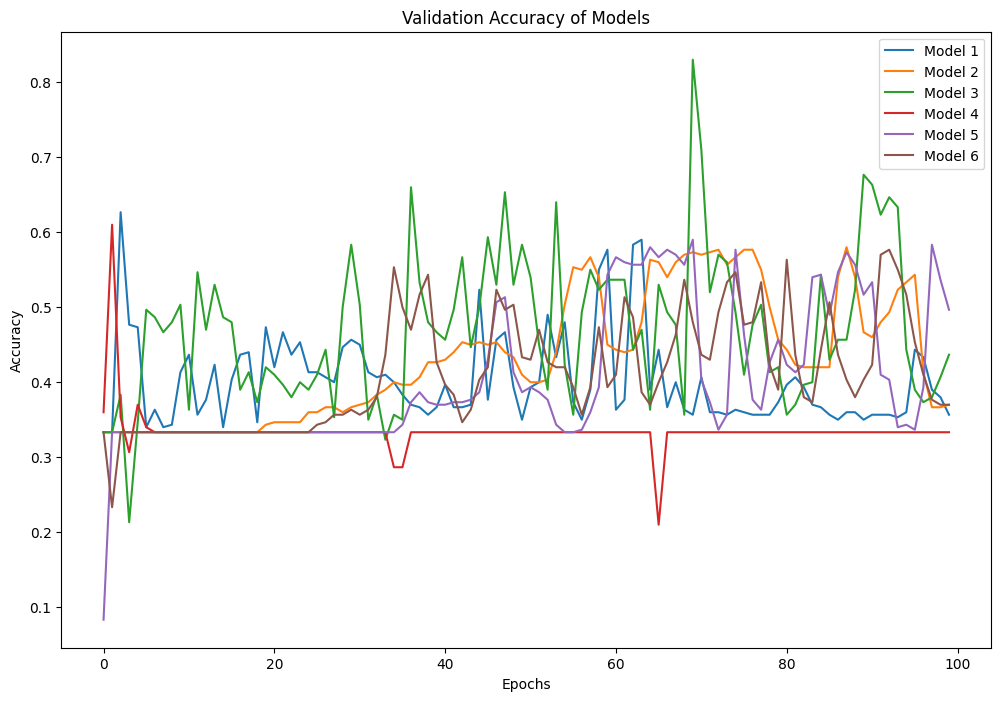

Model 5 achieved the highest accuracy of 49.67%


In [ ]:
import matplotlib.pyplot as plt

# 모든 모델 구조를 포함하는 함수 리스트를 정의
model_functions = [model_structure_1, model_structure_2, model_structure_3, model_structure_4, model_structure_5, model_structure_6]

histories = []
max_accuracy = 0.0
best_model_index = 0

for i, model_func in enumerate(model_functions):
    print(f"Training model {i+1}")

    # 모델 생성 및 컴파일
    model = model_func(input_shape)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # 학습
    history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                        epochs=100,
                        validation_data=(x_test, y_test),
                        callbacks=[AccuracyCallback()],
                        verbose=1)

    # 모델별 결과 저장
    histories.append(history)

    # 가장 높은 성능의 모델을 추적
    if history.history['val_accuracy'][-1] > max_accuracy:
        max_accuracy = history.history['val_accuracy'][-1]
        best_model_index = i

# 그래프 그리기
plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    plt.plot(history.history['val_accuracy'], label=f"Model {i+1}")

plt.title("Validation Accuracy of Models")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 가장 높은 성능을 가진 모델의 결과 출력
print(f"Model {best_model_index + 1} achieved the highest accuracy of {max_accuracy*100:.2f}%")


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 조기 종료를 위한 콜백 정의
class AccuracyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        if logs.get('val_accuracy') >= 0.80:  # 검증 정확도가 80% 이상일 경우
            print("\n80% 이상의 정확도에 도달하여 학습을 중지합니다.")
            self.model.stop_training = True

# 모델 3 정의
def model_structure_3(input_shape):
    model=keras.models.Sequential()
    model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(n_dense, activation='relu'))
    model.add(keras.layers.Dense(3, activation='softmax'))
    return model

# 모델 인스턴스 생성 및 컴파일
input_shape = (28, 28, 3)
model_3 = model_structure_3(input_shape)
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 데이터 확장 설정
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

# 학습시 조기 종료 콜백 사용
history = model_3.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=100
                    validation_data=(x_test, y_test),
                    callbacks=[AccuracyCallback()],
                    verbose=1)

test_loss, test_accuracy = model_3.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")


Epoch 1/100
5/5 [==============================] - 1s 93ms/step - loss: 36.6474 - accuracy: 0.2941 - val_loss: 19.5044 - val_accuracy: 0.3333
Epoch 2/100
5/5 [==============================] - 0s 72ms/step - loss: 13.2182 - accuracy: 0.4510 - val_loss: 10.6111 - val_accuracy: 0.3333
Epoch 3/100
5/5 [==============================] - 0s 99ms/step - loss: 5.7524 - accuracy: 0.4118 - val_loss: 5.5738 - val_accuracy: 0.3400
Epoch 4/100
5/5 [==============================] - 1s 106ms/step - loss: 4.8027 - accuracy: 0.3987 - val_loss: 2.5250 - val_accuracy: 0.2200
Epoch 5/100
5/5 [==============================] - 1s 107ms/step - loss: 1.9042 - accuracy: 0.5163 - val_loss: 1.8469 - val_accuracy: 0.5233
Epoch 6/100
5/5 [==============================] - 0s 92ms/step - loss: 1.4167 - accuracy: 0.5882 - val_loss: 1.0526 - val_accuracy: 0.5133
Epoch 7/100
5/5 [==============================] - 0s 106ms/step - loss: 0.9960 - accuracy: 0.6536 - val_loss: 1.3589 - val_accuracy: 0.5367
Epoch 8/100
5